# HANWRITTEN DIGIT RECOGNITION USING MNIST DATA SETS AND DEEP LEARNING

* OPIMISATION FN USED -> GRADIENT DESCENT
* Activation fn is Relu in inner layer and sigmoid in last layer
* first 10000 data used for training and next 5000 for testing

In [1]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #importing libraray
import math
import scipy.optimize as opt

In [2]:
def relu(z):
    z[z<=0]=0
    
    return z
def relu_grad(z):
    z[z>=0]=1
    z[z<0]=0
    return z
        
        
def sigmoid(x):
    return 1 / (1 + np.exp(-x))  #sigmoid fn
def sigmoidgrad(z): #it compute derivate of sigmoid of the fn
    return sigmoid(z)*(1-sigmoid(z))

print(sigmoidgrad(0))


0.25


In [3]:
data = pd.read_csv('C:\\Users\\PRASHANT\\Desktop\\coding dec19\\project\\train.csv\\train.csv')

In [4]:
data.shape

(42000, 785)

In [5]:
flag=int(input("Enter 1 if you want to train the model"))

Enter 1 if you want to train the model1


In [6]:
mtrain=35000
mtest=3500
mval=3500
n_para=784
n_pixel=28

* data is present inside a csv file which is loaded using pandas
* data is 42000 X 785 size matrix 
* 3500 for training and 3500 for testing and 3500 for validation
* next 3500 for training and next 3500 for test
* 784 column is for 28 X 28 pixel image
* first column for output
* and next 784 column represent one pixel
* each pixel contain value denoting intensity from 0 to 255 we regularize all column to obtain between 0 to 1
* output Y is 35000 X 1 matrix , which actually represnt that no 
* we take out 1th column to 784th as X and  transpose it
* we take out 0th column in Y

* we comput y1 matrix which is 35000 X 10 matrix which contain 1 at poition which is value of Y in that row
* we compute A2 matrix which result of forward propagation 
* from A3 we compute ouput matrix which contain digit from 1 to 9 in 35000 X 1 matrix
* we compare output with Y matrix to find accuracy on test dat

In [7]:
print(data.head()) #data is present inside dataframe which is obtained from csv files
X=np.array(data)[:mtrain,1:]
X_v=np.array(data)[mtrain:mtrain+mval,1:]
X=X.T # X is 400 X 35000
X_v=X_v.T
Y=np.array(data)[:mtrain,:1]
Y_v=np.array(data)[mtrain:mtrain+mval,:1]

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

* i have taken 1 to 35000 column for training
*  3500 separate data  is used for testing
* 3500  data is used for validation after each iteration of gradient descent pass through data
* validation data donot contribut to theta but they only help us to know when it is better to stop

In [8]:
print(np.max(X))
print(np.min(Y))

255
0


In [9]:
type(data)

pandas.core.frame.DataFrame

In [10]:
X=X/255.0
print(X[1:10,1:])
print(np.max(X))
print(np.min(X))

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
1.0
0.0


In [11]:
X_v=X_v/255
print(np.max(X_v))
print(np.min(X_v))

1.0
0.0


In [12]:

m_v=mval
#theta1=np.random.uniform(-0.12,0.12,(25,n_para)) # random initilization need to be done in Neural N. (but not in Log. Reg.)
theta1 = np.random.uniform(-0.12,0.12,(256,n_para))
b1=np.zeros([256,1])
#theta2=np.random.uniform(-0.12,0.12,(25,25))
theta2 = np.random.uniform(-0.12,0.12,(64,256))
b2=np.zeros([64,1])

theta3=np.random.uniform(-0.12,0.12,(10,64))
b3=np.zeros([10,1])

print(X.shape)
print(X_v.shape)
print(theta1.shape,b1.shape,theta2.shape,b2.shape,theta3.shape,b3.shape)


(784, 35000)
(784, 3500)
(256, 784) (256, 1) (64, 256) (64, 1) (10, 64) (10, 1)


In [13]:
print(X.shape,Y.shape)

(784, 35000) (35000, 1)


In [14]:
print(X_v.shape,Y_v.shape)

(784, 3500) (3500, 1)


In [15]:

print(Y.shape,type(Y))
#np.place(Y, Y == 10, 0)
print(Y[0:mtrain,:])

(35000, 1) <class 'numpy.ndarray'>
[[1]
 [0]
 [1]
 ...
 [7]
 [7]
 [0]]


In [16]:


print(Y.shape,type(Y))
print(X.shape,type(X))
print(Y)

(35000, 1) <class 'numpy.ndarray'>
(784, 35000) <class 'numpy.ndarray'>
[[1]
 [0]
 [1]
 ...
 [7]
 [7]
 [0]]


In [17]:


print(Y_v.shape,type(Y_v))
print(X_v.shape,type(X_v))
print(Y_v)

(3500, 1) <class 'numpy.ndarray'>
(784, 3500) <class 'numpy.ndarray'>
[[2]
 [2]
 [5]
 ...
 [1]
 [1]
 [9]]


In [18]:
n_label=10


print(theta1.shape)
print(theta2.shape)
print(theta3.shape)

print(X.shape)

print(type(X))

(256, 784)
(64, 256)
(10, 64)
(784, 35000)
<class 'numpy.ndarray'>


In [19]:
   

    # prediction function take input and predict output    
def predictions(theta1,theta2,theta3,b1,b2,b3,X):
        A0=X #784 X m
        print("input shape ",A0.shape)
        Z1=theta1@A0+b1        #256 X m
        A1=relu(Z1)            #256 X m
        Z2=theta2@A1+b2        # 64 X m
        A2=relu(Z2)            # 64 X m
        #print("A2 shape ",A2.shape)
        Z3=theta3@A2+b3        #10 X m
        A3=sigmoid(Z3)         #10 X m
   
        output=np.argmax(A3, axis=0)   # 1 X m
        output=output.reshape((output.shape[0],1))
        #print("The predicted image ar ",output_rand)
        return output


In [20]:
print("The predictions are")
output=predictions(theta1,theta2,theta3,b1,b2,b3,X)
print(output)

The predictions are
input shape  (784, 35000)
[[0]
 [0]
 [4]
 ...
 [6]
 [5]
 [1]]


In [21]:
def accuracy(theta1,theta2,theta3,b1,b2,b3,X,Y):
    A0=X
   # print("A0 shape ",A0.shape)
    Z1=theta1@A0+b1
    A1=relu(Z1) # in all layer except last layer relu activation fn is used
    #print("A1 shape ",A1.shape)
   # print(A1.shape)
    Z2=theta2@A1+b2
    A2=relu(Z2)
    #print("A2 shape ",A2.shape)
    Z3=theta3@A2+b3
    A3=sigmoid(Z3)
    
   # print("A3 shape ",A3.shape)
    output=np.argmax(A3, axis=0) #output contain predicted digit using hypothesis
    #print("output shape ",output.shape)
    #print(Y)
    output=output.reshape((Y.shape))
    #print("output shape",output.shape)
    #print(output)
    print(" accuracy  :", str(100 * np.mean(output == Y)) + "%")

    

In [22]:
print(" accuracy on training data  without training :")
accuracy(theta1,theta2,theta3,b1,b2,b3,X,Y)

 accuracy on training data  without training :
 accuracy  : 10.094285714285714%


In [23]:
print(Y.shape)
print(output.shape)


(35000, 1)
(35000, 1)


In [24]:

y1=np.zeros([10,mtrain])
for u in range(0,mtrain):
    y1[Y[u],u]=1
print(y1)

[[0. 1. 0. ... 0. 0. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 1. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [25]:
m_v=mval
y1_v=np.zeros([10,m_v])
for u in range(0,mval):
        y1_v[Y_v[u],u]=1

In [26]:
X.shape

(784, 35000)

In [27]:
def cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1,m=mtrain):
    
    
    
    lambda1=1
    A0=X
    
    Z1=theta1@A0+b1
    A1=relu(Z1)
    Z2=theta2@A1+b2
    A2=relu(Z2)
    
    Z3=theta3@A2+b3
    A3=sigmoid(Z3)
    A3[A3==0]=0.00001
    A3[A3==1]=0.99999
    
    J_cost1=np.sum((y1*np.log(A3))+((1-y1)*np.log(1-A3)) )
    J_cost2=np.sum(np.square(theta1))+np.sum(np.square(theta2))+np.sum(np.square(theta3))
    J_final=(J_cost1)/(-m)+(lambda1/(2*m))*J_cost2
    #print("regularised cost is ",J_final)
    return J_final

print("regularised cost is ",cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1))

regularised cost is  6.996386922100161


In [28]:
def compute_grad(theta1,b1,theta2,b2,theta3,b3,X,y1,alpha,m=mtrain):
    
    
    #forward propagation
    A0=X                  #784 X m
    
    Z1=theta1@A0+b1       #256 X m        (256 X 784)  X (784 X m)
    A1=relu(Z1)           #256 X m         
    Z2=theta2@A1+b2       # 64 X m        (64 X 256)  X (256 X m)
    A2=relu(Z2)          # 64 X m
   
    Z3=theta3@A2+b3     #10 X m           (10 X 64 ) X (64 X m)
    A3=sigmoid(Z3)      #10 X m
    A3[A3==0]=0.00001
    A3[A3==1]=0.99999
    
      
     #backward propagation  
    
    delta3=A3-y1                        #10 X m
    Delta3=(delta3@(A2.T))/m            #a3=A1  #dw3      10 X 64             (10 X m ) X ( m X 64)
    db3=np.sum(delta3,axis=1)/m         # 10 X 1
    db3=db3.reshape((10,1))
    
    #delta2=((delta3)@(theta3))*(sigmoidgrad(A2))  # 10 Xm
    delta2=((theta3.T)@(delta3))*(relu_grad(A2))   # 64 Xm
    Delta2=(delta2@(A1.T))/m #a1=A1  #dw2            64 X 256     # (64 X m) X ( m X 256 ) 
    db2=np.sum(delta2,axis=1) /m                   # 64 X 1
    db2=db2.reshape((64,1))
    
    delta1=((theta2.T)@(delta2))*(relu_grad(A1))  # 256 X m    (256 X 64) X ( 64 X m )
    Delta1=(delta1@(A0.T))/m #a1=A1  #dw2           256 X 784   (256 X m) X (m X 784)
    db1=np.sum(delta1,axis=1) /m                  # 256 X 1
    db1=db1.reshape((256,1))
    
    theta3=theta3-(alpha)*Delta3                    # 10 X 64
    theta2=theta2-(alpha)*Delta2                    #  64 X 256
    theta1=theta1-(alpha)*Delta1                    #  256 X 784
    b1=b1-(alpha)*db1
    b2=b2-(alpha)*db2
    b3=b3-(alpha)*db3
    return [theta1 ,theta2 ,theta3, b1, b2, b3]
    
   

In [29]:
y1=np.zeros([10,mtrain])
for u in range(0,mtrain):
        y1[Y[u],u]=1



In [30]:
m_v=2000
y1_v=np.zeros([10,mval])
for u in range(0,mval):
        y1_v[Y_v[u],u]=1



# Training and validating using cost and accuracy on training aswell as validation data

In [31]:
    
def train_model(theta1,b1,theta2,b2,theta3,b3,X,Y,y1,mtrain,X_v,Y_v,y1_v,mval):    
    alpha=0.1 #initially i take large value of alpha ie lerning rate
    for i1 in range(0,4000):
        [theta1 ,theta2 ,theta3, b1, b2, b3]=compute_grad(theta1,b1,theta2,b2,theta3,b3,X,y1,alpha,mtrain)
        if i1%200==0:
            print("Iteration ",i1,end=" ")
            print(" Trainingcost is <<<<<-",cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1,mtrain))
            print("\t\tTraining  ",end=' ')
            accuracy(theta1,theta2,theta3,b1,b2,b3,X,Y)
            print(" \t\tvalidation cost         ->>>>",cost_reg(theta1,b1,theta2,b2,theta3,b3,X_v,y1_v,mval))
            print("\t\tVaidation  ",end=' ')
            accuracy(theta1,theta2,theta3,b1,b2,b3,X_v,Y_v)
            #print(" accuracy on training data  without training :", str(100 * np.mean(output == Y)) + "%")
            
            print()
    return  [theta1 ,theta2 ,theta3, b1, b2, b3]

In [32]:
if flag:
    [theta1 ,theta2 ,theta3, b1, b2, b3]=train_model(theta1,b1,theta2,b2,theta3,b3,X,Y,y1,mtrain,X_v,Y_v,y1_v,mval)

Iteration  0  Trainingcost is <<<<<- 5.105204823003677
		Training    accuracy  : 11.437142857142856%
 		validation cost         ->>>> 5.235273668005036
		Vaidation    accuracy  : 11.257142857142858%

Iteration  200  Trainingcost is <<<<<- 0.7480473948263111
		Training    accuracy  : 89.69142857142856%
 		validation cost         ->>>> 0.8730969532395397
		Vaidation    accuracy  : 89.74285714285715%

Iteration  400  Trainingcost is <<<<<- 0.5986349357788435
		Training    accuracy  : 91.44857142857143%
 		validation cost         ->>>> 0.7382840306178376
		Vaidation    accuracy  : 91.02857142857142%

Iteration  600  Trainingcost is <<<<<- 0.5414832444836334
		Training    accuracy  : 92.35142857142857%
 		validation cost         ->>>> 0.6888356784819383
		Vaidation    accuracy  : 91.85714285714286%

Iteration  800  Trainingcost is <<<<<- 0.5057265888248355
		Training    accuracy  : 92.96857142857144%
 		validation cost         ->>>> 0.6590076258050741
		Vaidation    accuracy  : 92.457142857

* from regularisation cost and validation cost we can do early stopping
* from both of these cost we can predict that it is better to stop at 2000 iteration and we are overfitting after 2000
* since validation cost has started to increasing after 2000 iteration it means model is overfitting after that
* we are not training our model on validation data we are only finding cost to do early stopping and avoid overfitting

In [33]:
print("For Training data")
accuracy(theta1,theta2,theta3,b1,b2,b3,X,Y)
cost_reg(theta1,b1,theta2,b2,theta3,b3,X,y1)

For Training data
 accuracy  : 95.16571428571429%


0.36637337027233347

* It is possible to achieve nearly 99 % accuracy using more iteration but our model will be ,then overfitting and will not generalize   to new data sets
    

# Training done
* now we have achieved a trained model which we will used to test random data with 28 X 28 pixel digit converted to 784 pixel 
as 784 feature which shows grayscale value of each digit
 

# Now testing of different data 
* we are using nearly half as training data for testing

In [34]:
m_t_s=mval+mtrain  #where to start
m_test=3500

In [35]:
X_test=np.array(data)[m_t_s:m_t_s+mtest,1:]
X_test=X_test.T # X is 400 X 5000
Y_test=np.array(data)[m_t_s:m_t_s+mtest,:1]

In [36]:
Y_test.shape

(3500, 1)

In [37]:
X_test.shape

(784, 3500)

In [38]:
X_test=X_test/255

In [39]:
y1_test=np.zeros([10,m_test])
for u in range(0,mtest):
    y1_test[Y_test[u],u]=1
print(y1_test)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [40]:
print("Test  ",end=" ")
accuracy(theta1,theta2,theta3,b1,b2,b3,X_test,Y_test) # printing test accuracy

Test    accuracy  : 93.85714285714286%


In [41]:
print("Cost on test data ",end=':')
print(cost_reg(theta1,b1,theta2,b2,theta3,b3,X_test,y1_test,m_test) )

Cost on test data :0.6272247514569266


In [42]:
print(theta1.shape,theta2.shape,theta3.shape,b1.shape,b2.shape,b3.shape)

(256, 784) (64, 256) (10, 64) (256, 1) (64, 1) (10, 1)


# MODEL TRAINING AND TESTING DONE!
* now we store model

In [43]:
def store_model(theta1,theta2,theta3,b1,b2,b3):
        import pandas as pd 
        pd.DataFrame(theta1).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\theta1.csv")
        pd.DataFrame(theta2).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\theta2.csv")
        pd.DataFrame(theta3).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\theta3.csv")
        pd.DataFrame(b1).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\b1.csv")
        pd.DataFrame(b2).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\b2.csv")
        pd.DataFrame(b3).to_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\b3.csv")

In [44]:
flag1=int(input("Enter 1 if you want to update model"))

Enter 1 if you want to update model1


In [45]:
if flag1:
        store_model(theta1,theta2,theta3,b1,b2,b3)

# Thus our model has nerly 94% accuracy on training data and has nearly 91% to 93% accuracy on test data which is quite good

#   No need to run part above it every time , just use weights stored in csv file

In [46]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  #importing libraray
import math
import scipy.optimize as opt


In [47]:
theta11=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\theta1.csv")
theta21=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\theta2.csv")
theta31=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\theta3.csv")
b11=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\b1.csv")
b21=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\b2.csv")
b31=pd.read_csv("C:\\Users\PRASHANT\\Desktop\\coding dec19\\project\\train_parameter\\b3.csv")

In [48]:
theta1=np.array(theta11)[:,1:]
theta2=np.array(theta21)[:,1:]
theta3=np.array(theta31)[:,1:]
b1=np.array(b11)[:,1:]
b2=np.array(b21)[:,1:]
b3=np.array(b31)[:,1:]
print(theta1.shape,theta2.shape,theta3.shape,b1.shape,b2.shape,b3.shape)

(256, 784) (64, 256) (10, 64) (256, 1) (64, 1) (10, 1)


# Testing 10 random digit 

In [49]:
X_rand=np.array(data)[32000:32020,1:]
X_rand=X_rand.T # X is 400 X 5000
Y_rand=np.array(data)[32000:32020,:1]
print(Y_rand)

[[6]
 [7]
 [0]
 [9]
 [1]
 [7]
 [3]
 [9]
 [3]
 [4]
 [1]
 [8]
 [7]
 [0]
 [8]
 [7]
 [0]
 [5]
 [7]
 [5]]


In [50]:
X_rand=X_rand/255

X_rand=X1_rand

In [51]:
y1_rand=np.zeros([10,20]) # nearly zero to avoid any problem
for u in range(0,20):
    y1_rand[Y_rand[u],u]=1
print(y1_rand)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


* appling our algorithm to predict digit uxing pixel value given
* pixel value is given in X_rand and we get digit in output_rand

In [52]:
output_rand=predictions(theta1,theta2,theta3,b1,b2,b3,X_rand) # predict based on model

input shape  (784, 20)


In [53]:
print(" Actual digit                Prediction")
for i1 in range(0,20):
    print(Y_rand[i1],"               ",output_rand[i1])
  

 Actual digit                Prediction
[6]                 [6]
[7]                 [7]
[0]                 [0]
[9]                 [9]
[1]                 [1]
[7]                 [7]
[3]                 [3]
[9]                 [9]
[3]                 [3]
[4]                 [4]
[1]                 [1]
[8]                 [8]
[7]                 [7]
[0]                 [0]
[8]                 [8]
[7]                 [7]
[0]                 [0]
[5]                 [5]
[7]                 [7]
[5]                 [5]


print(mn,std)

In [54]:
print("Test accuracy:", str(100 * np.mean(output_rand == Y_rand)) + "%") #str is used to convert float to string to concat % with it

Test accuracy: 100.0%


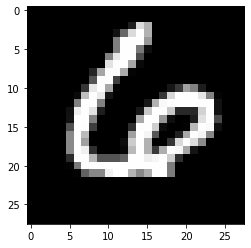

         My algorithm predict it to be   [6]
            Actually it is  [6]



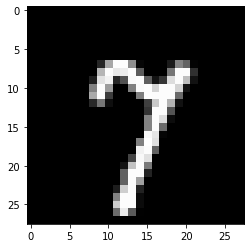

         My algorithm predict it to be   [7]
            Actually it is  [7]



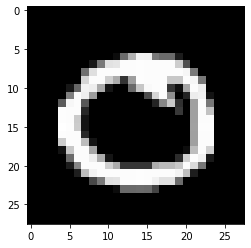

         My algorithm predict it to be   [0]
            Actually it is  [0]



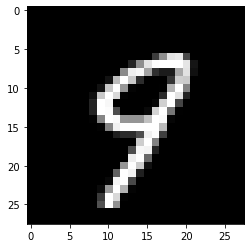

         My algorithm predict it to be   [9]
            Actually it is  [9]



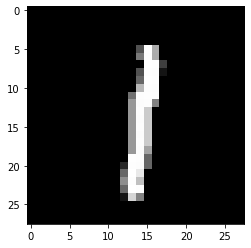

         My algorithm predict it to be   [1]
            Actually it is  [1]



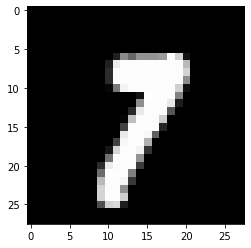

         My algorithm predict it to be   [7]
            Actually it is  [7]



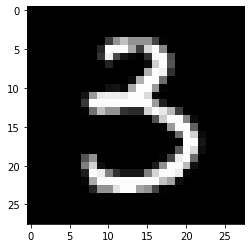

         My algorithm predict it to be   [3]
            Actually it is  [3]



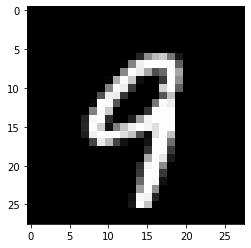

         My algorithm predict it to be   [9]
            Actually it is  [9]



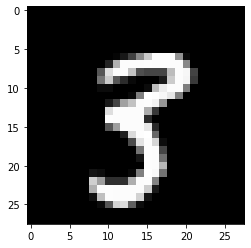

         My algorithm predict it to be   [3]
            Actually it is  [3]



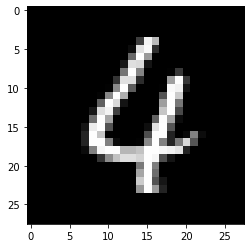

         My algorithm predict it to be   [4]
            Actually it is  [4]



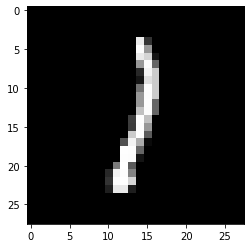

         My algorithm predict it to be   [1]
            Actually it is  [1]



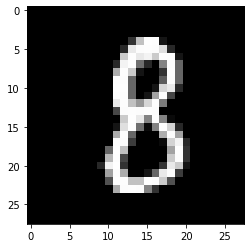

         My algorithm predict it to be   [8]
            Actually it is  [8]



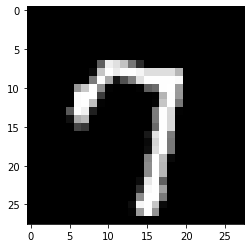

         My algorithm predict it to be   [7]
            Actually it is  [7]



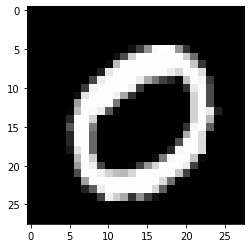

         My algorithm predict it to be   [0]
            Actually it is  [0]



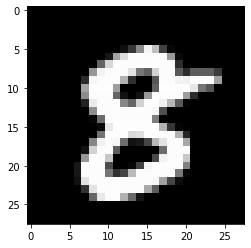

         My algorithm predict it to be   [8]
            Actually it is  [8]



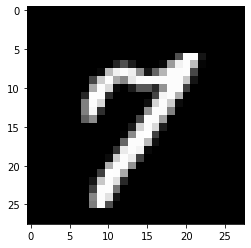

         My algorithm predict it to be   [7]
            Actually it is  [7]



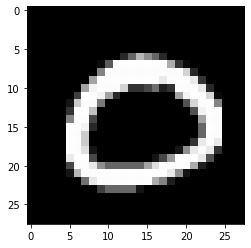

         My algorithm predict it to be   [0]
            Actually it is  [0]



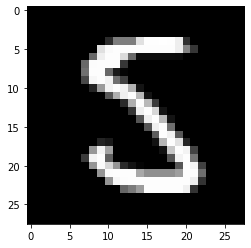

         My algorithm predict it to be   [5]
            Actually it is  [5]



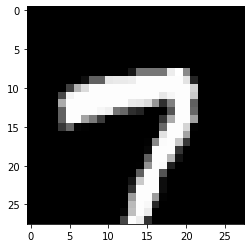

         My algorithm predict it to be   [7]
            Actually it is  [7]



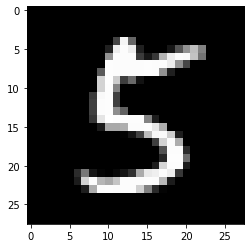

         My algorithm predict it to be   [5]
            Actually it is  [5]



In [55]:
X_rand1=(X_rand.T)*256
import matplotlib.pyplot as plt
import numpy as np
 
#X = np.random.random((100, 100)) # sample 2D array
for i1 in range(0,20):
    plt.imshow(X_rand1[i1].reshape([n_pixel,n_pixel]), cmap="gray")
    plt.show()
    print("         My algorithm predict it to be  ",output_rand[i1])
    print("            Actually it is ",Y_rand[i1])
    
     
    print()
    

In [56]:
import matplotlib.image as mp
import numpy as np
from PIL import Image
#image1 = Image.open('C:\\Users\\PRASHANT\\Desktop\\coding dec19\\file_neural\\three1.png')



# frontend part

In [57]:
image_name=input("paste here your image name ")

paste here your image name six1.png


In [58]:
location=''
loc=input("paste image location in your computer")
a1="""\\"""
a1=a1[0]
#print(a1)

for i1 in range(0,len(loc)):
    if loc[i1]== a1:
        
        location=location+a1+a1
    else:
        location=location+loc[i1]
img=location+a1+a1+image_name        
print("your loaction with image name",img)        
    
    

paste image location in your computerC:\Users\PRASHANT\Desktop\coding dec19\project
your loaction with image name C:\\Users\\PRASHANT\\Desktop\\coding dec19\\project\\six1.png


In [59]:
import cv2

In [60]:
img7=cv2.imread(img,cv2.IMREAD_GRAYSCALE)

In [61]:
type(img7)

numpy.ndarray

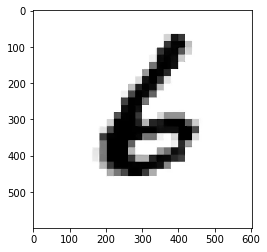

In [62]:
plt.imshow(img7, cmap="gray")
plt.show()

In [63]:
img7.shape

(599, 602)

In [64]:
img8=cv2.resize(img7,(28,28))

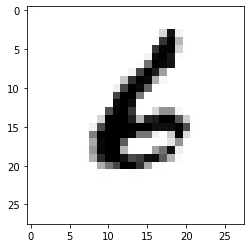

In [65]:
plt.imshow(img8, cmap="gray")
plt.show()

In [66]:
img8.shape

(28, 28)

In [67]:
image1=img8
#image1=np.array(image1).reshape((len(image1,1))
print(type(image1))
#image1=np.array(image1).reshape((len(image1),1))

<class 'numpy.ndarray'>


In [68]:
image1=np.array(image1).reshape(784,1)

In [69]:
image1=255-image1

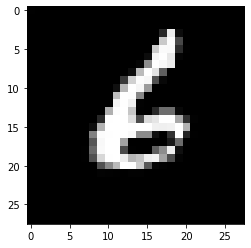

In [70]:
plt.imshow(image1.reshape([28,28]), cmap="gray")
plt.show()

In [71]:
np.max(image1)

255

In [72]:
type(image1)

numpy.ndarray

In [73]:
image1.shape

(784, 1)

image1=np.array(image1)


In [74]:
np.max(image1)

255

In [75]:
np.min(image1)

0

image9=image1-mn
image10=image9/std

In [76]:
image10=image1/255

In [77]:
np.max(image10)

1.0

In [78]:
image1=image10

In [79]:
np.min(image1)

0.0

In [80]:
np.max(image1)

1.0

In [81]:
print(type(image1))
print(image1.shape)

<class 'numpy.ndarray'>
(784, 1)


In [82]:
output_rand=predictions(theta1,theta2,theta3,b1,b2,b3,image1)  #predict based on model

input shape  (784, 1)


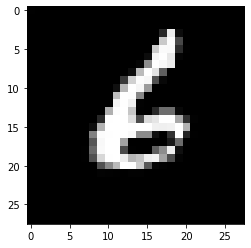

     My algorithm predict it to be   [[6]]


In [83]:
    plt.imshow(image1.reshape([28,28]), cmap="gray")
    plt.show()
    print("     My algorithm predict it to be  ",output_rand)
   

In [84]:
max(image1)

array([1.])

In [85]:
min(image1)

array([0.])

In [86]:
z1=output[Y==3]

In [87]:
print(z1.shape)

(3622,)


In [88]:
print(z1[:100])

[0 0 0 1 4 0 6 1 0 0 4 4 6 5 4 4 0 6 0 4 0 5 0 0 4 0 0 4 0 0 0 4 4 0 0 6 0
 0 0 0 0 0 0 0 0 0 0 0 0 6 1 0 8 2 0 4 0 8 0 4 6 0 0 0 6 0 0 6 1 0 0 0 0 0
 0 4 0 0 0 4 0 1 0 1 0 0 0 0 8 6 0 1 0 0 0 0 4 5 0 0]


In [91]:
A0=(X_rand.T)[0].reshape(784,1)#20 X 784
print("The predicted image is ")
print(predictions(theta1,theta2,theta3,b1,b2,b3,A0)) # predict based on model

The predicted image is 
input shape  (784, 1)
[[6]]


In [92]:
X_rand.shape

(784, 20)